# Lab 1: Random Network

Generate a random network with N = 100 with an average degree 〈k〉 = 20 for all 
the nodes. You may use the Erdős-Rényi model [1], the Gilbert model [2], or the 
configuration  model.  They  specify  the  number  of  edges,  the  probability  of 
connection, and the degree sequence respectively. 

In [47]:
import networkx as nx
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt
from matplotlib import style
from functools import partial as part
import random

style.use("seaborn")

er_fast = nx.fast_gnp_random_graph


/tmp/ipykernel_1248/3219751462.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


In [2]:
def er_fast_Nk(N, kavg, seed=123456):
    p = kavg/(N-1)
    return er_fast(N, p, seed=seed)


## (a) Plot its degree distribution P(k)

In [6]:
def degplot(degs, *args, plotter=plt, **kwargs):
    km, kM = min(degs), max(degs)
    plotter.scatter(range(km, kM+1), (np.bincount(degs)/len(degs))
                 [km:kM+1], *args, **kwargs)


def degplot4rng(rng_gnr, *args, trials=10, seed=123456, plotter=plt, **kwargs):
    rngs = map(rng_gnr, range(seed, seed+trials))
    degs = [k for g in rngs for n, k in g.degree]
    degplot(degs, *args, plotter=plotter, **kwargs)
    return degs


def degplot4er(N, kavg, *args, trials=10, seed=123456, plotter=plt, **kwargs):
    degplot4rng(part(er_fast_Nk, N, kavg), *args, trials=trials,
                seed=seed, plotter=plotter, **kwargs)



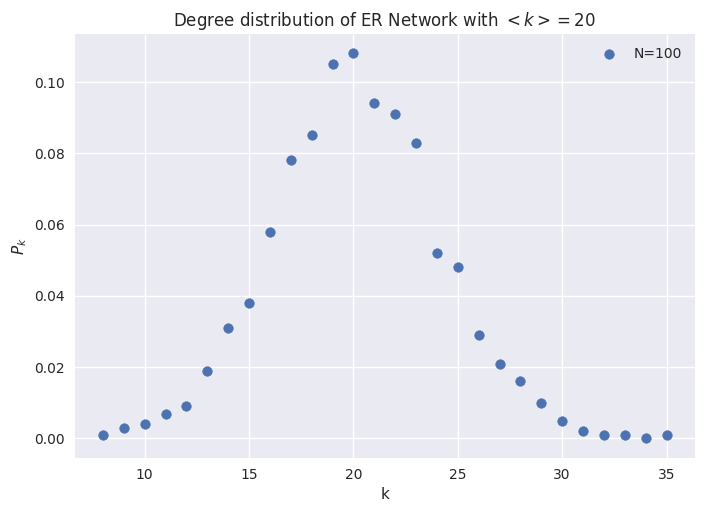

In [48]:
degplot4er(100,20,seed=5054,marker="o",label="N=100")
plt.xlabel("k")
plt.ylabel("$P_k$")
plt.title("Degree distribution of ER Network with $<k>=20$")
plt.legend()
plt.grid(True)
plt.show()


## (b) Compute its average shortest distance L. 

In [14]:
def aspl_estim(g: nx.Graph, nsample=10):
    """Average shortest path length estimate with random sampling method"""
    N = g.number_of_nodes()
    spls = []
    for _ in range(nsample):
        ps = nx.shortest_path_length(g, source=random.randint(0, N-1))
        spls.append(np.mean(tuple(ps.values())))
    return np.mean(spls)


def aspl4er(N, kavg, trials=10, seed=123456, nsample=False):
    """Average shortest path length for ER networks"""
    graphs = [er_fast_Nk(N, kavg, seed=seed+t) for t in range(trials)]
    random.seed(seed)
    ls = [aspl_estim(g, nsample=nsample)
          if nsample else nx.average_shortest_path_length(g) for g in graphs]
    lavg = np.mean(ls)
    lstd = np.std(ls)
    l = np.log(N)/np.log(kavg)
    l1 = (np.log(N)-0.57722)/np.log(kavg)+1/2
    return lavg, lstd, l, l1


There are two function here to compute the average shortest path length for specified ER network.

The first function `aspl_estim` is going to be used to compute average shortest path length using random sampling in order to save computing time, since unfortunately the `Floyd-Warshall` algorithm's time complexity is $O(N^3)$ which is expensive when $N$ becomes large. The algorithm of `aspl_estim` is quite simple, just choose a node $v$ in network randomly as source to compute shortest path length from $v$ to other nodes and compute the average of them to estimate the real average shortest path length of the network.

In the second function `aspl4er`, it uses `nx.average_shortest_path_length` or `aspl_estim` to average shortest path length for ER networks with specified times of trials. Meanwhile, this function also computes the std and its theory value of average shortest path length in two version.

The first version of average shortest path length:

$$
L\approx \frac{\ln N}{\ln <k>}
$$

which isn't accurate.

The seconde version of average shortest path length is from the paper ["Average path length in uncorrelated random networks with hidden variables"](https://arxiv.org/abs/cond-mat/0407098):

$$
L\approx \frac{\ln N - \gamma}{\ln <k>}+\frac12
$$

where $\gamma\approx 0.57722$. This one is more accurate than the first one.

In [20]:
lavg, lstd, l, l1 = aspl4er(100,20,trials=10,seed=5054,nsample=False)
print(f"Average shortest path length L for ER network(N=100,<k>=20) is {lavg}.")
print(f"The theoretical value are {l} and {l1}.")

Average shortest path length L for ER network(N=100,<k>=20) is 1.8095757575757574.
The theoretical value are 1.537243573680482 and 1.8445628040751212.


## (c) Now repeat (a) and (b) with N = 500, 1000, 5000, 10000. 

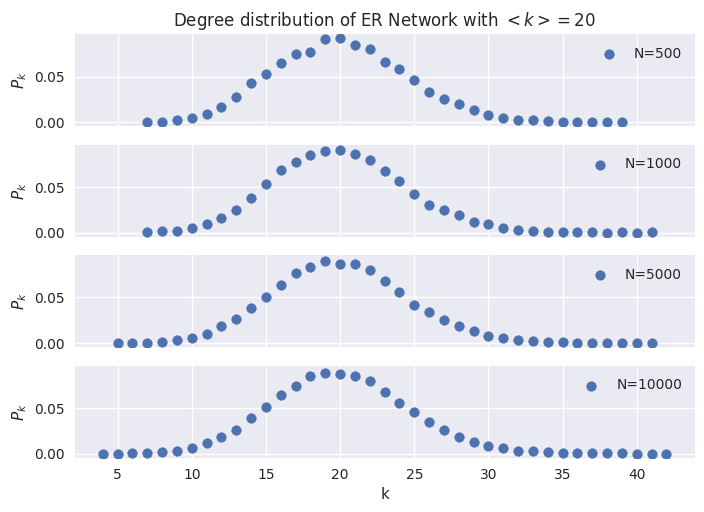

In [49]:
Ns = (500, 1000, 5000, 10000)
fig, axes = plt.subplots(4, 1, sharex=True,sharey=True)
for N, ax in zip(Ns, axes):
    degplot4er(N, 20, plotter=ax, seed=5054, marker="o", label=f"N={N}")
    ax.set_ylabel("$P_k$")
    ax.legend()
axes[0].set_title("Degree distribution of ER Network with $<k>=20$")
# axes[0].set_ylim([0,0.12])
axes[-1].set_xlabel("k")
plt.grid(True)
plt.show()


In [40]:
for N in Ns:
    lavg, lstd, l, l1 = aspl4er(N,20,trials=10,seed=5054,nsample=20)
    print(f"Average shortest path length L for ER network(N={N},<k>=20) is {lavg}±{lstd} and the theoretical values are {l} and {l1}.")

Average shortest path length L for ER network(N=500,<k>=20) is 2.3888799999999994±0.013336701241311364 and the theoretical values are 2.0744871473609634 and 2.381806377755603.
Average shortest path length L for ER network(N=1000,<k>=20) is 2.63815±0.024413684687076682 and the theoretical values are 2.3058653605207224 and 2.613184590915362.
Average shortest path length L for ER network(N=5000,<k>=20) is 3.125052±0.016793224109741274 and the theoretical values are 2.8431089342012044 and 3.150428164595844.
Average shortest path length L for ER network(N=10000,<k>=20) is 3.3933825±0.021357511939596344 and the theoretical values are 3.074487147360964 and 3.381806377755603.


## (d) Make a plot of the average shortest distance L as a function of ln N. 
What is the relation between L and N? 

In [52]:
(Ns:=np.floor(10**np.arange(2,4.5,0.2)).astype(int))

array([  100,   158,   251,   398,   630,  1000,  1584,  2511,  3981,
        6309, 10000, 15848, 25118])

In [43]:
lavg, lstd, l, l1 = zip(*map(lambda N:aspl4er(N, 20, trials=10, seed=5002, nsample=20),Ns))

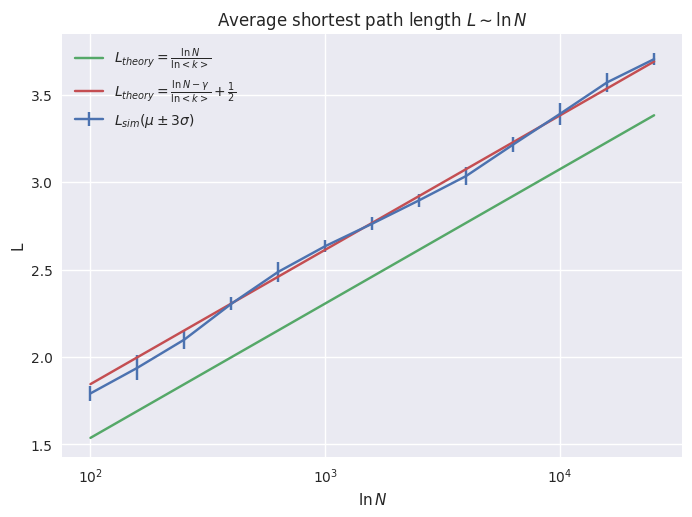

In [70]:
plt.errorbar(Ns,lavg,yerr=3*np.array(lstd),label=r"$L_{sim}(\mu\pm3\sigma)$")
plt.plot(Ns,l,label=r"$L_{theory}=\frac{\ln N}{\ln <k>}$")
plt.plot(Ns,l1,label=r"$L_{theory}=\frac{\ln N - \gamma}{\ln <k>}+\frac{1}{2}$")
plt.xscale("log")
plt.xlabel("$\ln N$")
plt.ylabel("L")
plt.title("Average shortest path length $L\sim \ln N$")
plt.grid(True)
plt.legend()
plt.show()